# Poker Rule Induction

0: Nothing in hand; not a recognized poker hand 
1: One pair; one pair of equal ranks within five cards
2: Two pairs; two pairs of equal ranks within five cards
3: Three of a kind; three equal ranks within five cards
4: Straight; five cards, sequentially ranked with no gaps
5: Flush; five cards with the same suit
6: Full house; pair + different rank three of a kind
7: Four of a kind; four equal ranks within five cards
8: Straight flush; straight + flush
9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush

In [1]:
import math
import pandas as pd
import numpy as np
import statsmodels  as stats

## Load Data with Pandas

In [2]:
train=pd.read_csv('poker-hand-training-true.data.txt',
                  names=['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5','Type'])
test=pd.read_csv('poker-hand-testing.data.txt',
                 names=['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5','Type'])

In [3]:
train.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Type
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


* Basic statistics about each column

In [4]:
train.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Type
count,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000
mean,2.508756,6.995242,2.497721,7.014194,2.510236,7.014154,2.495922,6.942463,2.497321,6.962735,0.621152
std,1.116483,3.749805,1.121767,3.766974,1.123148,3.744974,1.116009,3.747147,1.118732,3.741579,0.788361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [5]:
for column in train.columns:
    print(train[column].value_counts())

4    6312
2    6298
3    6250
1    6150
Name: S1, dtype: int64
1     1982
9     1967
7     1961
8     1948
2     1941
12    1940
11    1926
4     1919
13    1915
5     1892
3     1882
10    1877
6     1860
Name: C1, dtype: int64
1    6309
4    6300
2    6244
3    6157
Name: S2, dtype: int64
13    2007
1     1985
6     1956
12    1939
11    1931
10    1922
2     1921
7     1912
3     1912
4     1905
8     1898
9     1877
5     1845
Name: C2, dtype: int64
4    6419
1    6230
2    6208
3    6153
Name: S3, dtype: int64
10    2000
12    1987
3     1965
4     1935
7     1927
5     1920
11    1913
8     1912
13    1910
2     1910
1     1895
6     1884
9     1852
Name: C3, dtype: int64
3    6314
1    6269
2    6248
4    6179
Name: S4, dtype: int64
3     1999
2     1987
1     1983
11    1953
9     1946
7     1943
10    1924
6     1913
4     1902
5     1883
13    1874
8     1865
12    1838
Name: C4, dtype: int64
3    6314
1    6308
4    6216
2    6172
Name: S5, dtype: int64
8     1994
1     1970

* Draw histogram of labels

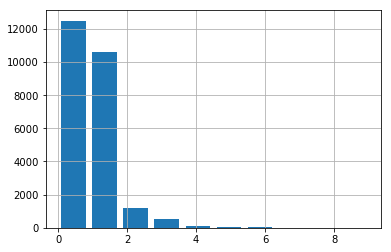

In [6]:
%matplotlib inline
train.Type.hist(rwidth=0.8)

In [8]:
print(train.shape)
print(test.shape)

(25010, 11)
(1000000, 11)


## Split both train and test into x and y

In [9]:
x_train=train[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']] 
y_train=train['Type']
x_test=test[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']]
y_test=test['Type']

* Build a baseline

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for n in [5,10,20]:
    clf=RandomForestClassifier(n_estimators=n)
    clf=clf.fit(x_train,y_train)
    print(n)
    print(classification_report(y_test,clf.predict(x_test)))
    print(accuracy_score(y_test,clf.predict(x_test)))
    print("------")


5


/Users/Tiger/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.57      0.68      0.62    501209
          1       0.48      0.44      0.46    422498
          2       0.17      0.02      0.04     47622
          3       0.17      0.01      0.03     21121
          4       0.08      0.00      0.01      3885
          5       0.43      0.01      0.03      1996
          6       0.05      0.00      0.00      1424
          7       0.00      0.00      0.00       230
          8       0.00      0.00      0.00        12
          9       0.00      0.00      0.00         3

avg / total       0.50      0.53      0.51   1000000

0.531433
------
10


/Users/Tiger/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.59      0.74      0.65    501209
          1       0.51      0.44      0.47    422498
          2       0.21      0.01      0.03     47622
          3       0.27      0.01      0.02     21121
          4       0.10      0.00      0.00      3885
          5       0.53      0.01      0.02      1996
          6       0.06      0.00      0.00      1424
          7       0.00      0.00      0.00       230
          8       0.00      0.00      0.00        12
          9       0.00      0.00      0.00         3

avg / total       0.53      0.56      0.53   1000000

0.558299
------
20


/Users/Tiger/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.60      0.76      0.67    501209
          1       0.53      0.46      0.49    422498
          2       0.28      0.01      0.01     47622
          3       0.32      0.00      0.01     21121
          4       0.21      0.00      0.00      3885
          5       0.87      0.01      0.01      1996
          6       0.33      0.00      0.00      1424
          7       0.00      0.00      0.00       230
          8       0.00      0.00      0.00        12
          9       0.00      0.00      0.00         3

avg / total       0.55      0.57      0.54   1000000

0.574388
------


In [13]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,clf.predict(x_test)))

[[379949 121148     97      9      5      1      0      0      0      0]
 [227776 193964    629    114     13      1      1      0      0      0]
 [ 17179  30021    361     57      3      0      1      0      0      0]
 [  5203  15680    142     94      2      0      0      0      0      0]
 [   851   3010     15      3      6      0      0      0      0      0]
 [  1633    350      0      0      0     13      0      0      0      0]
 [   184   1202     25     12      0      0      1      0      0      0]
 [    16    202      4      8      0      0      0      0      0      0]
 [     3      9      0      0      0      0      0      0      0      0]
 [     1      2      0      0      0      0      0      0      0      0]]


In [14]:
x_train[y_train==1].iloc[1:4,]

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
14,3,8,4,12,3,9,4,2,3,2
19,3,7,2,7,4,11,1,12,3,1
20,1,13,4,8,2,7,2,10,3,13


## Add hand count

In [15]:
def concat_card_count(data_set):
    suit_counts = []
    for i in range(1,14):
        each_counts = pd.concat([data_set.C1 ==i, data_set.C2 == i, data_set.C3 ==i, data_set.C4 == i, data_set.C5 ==i],axis=1)
        suit_counts.append(np.sum(each_counts,axis=1))
    suit_counts=np.vstack(suit_counts)
    suit_counts_df=pd.DataFrame(suit_counts.transpose(),columns=['C{}_Count'.format(i) for i in range(1,14)])
    return pd.concat([suit_counts_df,data_set], axis=1)

x_train = concat_card_count(x_train)
x_test=concat_card_count(x_test)
        

In [16]:
print(x_train.iloc[1:3,0:14])
print(x_train.iloc[1:3,14:]

   C1_Count  C2_Count  C3_Count  C4_Count  C5_Count  C6_Count  C7_Count  \
1         1         0         0         0         0         0         0   
2         1         0         0         0         0         0         0   

   C8_Count  C9_Count  C10_Count  C11_Count  C12_Count  C13_Count  S1  
1         0         0          1          1          1          1   2  
2         0         0          1          1          1          1   3  
   C1  S2  C2  S3  C3  S4  C4  S5  C5
1  11   2  13   2  10   2  12   2   1
2  12   3  11   3  13   3  10   3   1


In [17]:
clf=RandomForestClassifier(n_estimators=20)
clf=clf.fit(x_train,y_train)
print(classification_report(y_test,clf.predict(x_test)))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99    501209
          1       1.00      1.00      1.00    422498
          2       0.97      0.97      0.97     47622
          3       0.98      0.99      0.99     21121
          4       1.00      0.18      0.30      3885
          5       0.00      0.00      0.00      1996
          6       0.86      0.02      0.04      1424
          7       0.00      0.00      0.00       230
          8       0.00      0.00      0.00        12
          9       0.00      0.00      0.00         3

avg / total       0.99      0.99      0.99   1000000



/Users/Tiger/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


* F1 score for type 1 increased to 1, type 2 and type 3 improved a lot

## Add Standard Deviation to help correctly classify Type 4b

In [19]:
x_train=train[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']] 
y_train=train['Type']
x_test=test[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']]
y_test=test['Type']

def concat_card_count(data_set):
    suit_counts = []
    for i in range(1, 14):
        each_counts = pd.concat([data_set.C1 == i, data_set.C2 == i, data_set.C3 == i, data_set.C4 == i,data_set.C5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['C{}_Count'.format(i) for i in range(1,14)])
    return pd.concat([suit_counts_df, data_set], axis=1)

x_train = concat_card_count(x_train)
x_test = concat_card_count(x_test)

def concat_card_std(data_set):
    std=np.std(data_set[['C1','C2','C3','C4','C5']],axis=1)
    std_df=pd.DataFrame(std,columns=['Card_std'])
    return pd.concat([std_df,data_set],axis=1)
x_train=concat_card_std(x_train)
x_test=concat_card_std(x_test)

clf=RandomForestClassifier(n_estimators=20)
clf=clf.fit(x_train,y_train)
print(classification_report(y_test,clf.predict(x_test)))
    

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    501209
          1       1.00      1.00      1.00    422498
          2       0.97      0.98      0.98     47622
          3       0.98      0.98      0.98     21121
          4       1.00      0.90      0.95      3885
          5       0.17      0.00      0.00      1996
          6       0.94      0.04      0.07      1424
          7       0.29      0.01      0.02       230
          8       0.00      0.00      0.00        12
          9       0.00      0.00      0.00         3

avg / total       0.99      0.99      0.99   1000000



In [20]:
x_test[(y_test==4)&(clf.predict(x_test)!=4)][1:3]
x_test[(y_test==4)&(clf.predict(x_test)==4)][1:3]

,Card_std,C1_Count,C2_Count,C3_Count,C4_Count,C5_Count,C6_Count,C7_Count,C8_Count,C9_Count,...,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
643,1.414214,0,1,1,1,1,1,0,0,0,...,3,3,3,6,4,4,1,2,2,5
918,1.414214,0,0,0,0,1,1,1,1,1,...,3,8,2,7,3,9,2,6,1,5


Performance for type 4 increased a lot
BUG: In one specific situation, 1 can be combined with 10,11,12,13 and becomes a type 4 
FIX: Calculate std with 1, then replace all 1 with 14, calculate again, if the std is smaller, then replace old one with this one

## Fix type 4 error

In [21]:
x_train=train[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']] 
y_train=train['Type']
x_test=test[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']]
y_test=test['Type']

def concat_card_count(data_set):
    suit_counts = []
    for i in range(1, 14):
        each_counts = pd.concat([data_set.C1 == i, data_set.C2 == i, data_set.C3 == i, data_set.C4 == i,data_set.C5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['C{}_Count'.format(i) for i in range(1,14)])
    return pd.concat([suit_counts_df, data_set], axis=1)

x_train = concat_card_count(x_train)
x_test = concat_card_count(x_test)

def concat_card_std(data_set):
    hands=data_set[['C1','C2','C3','C4','C5']].as_matrix()
    std=np.std(hands,axis=1)
    hands[hands==1] =14
    new_std = np.std(hands, axis=1)
    std[new_std<std] = new_std[new_std < std]
    std_df=pd.DataFrame(std,columns=['Card_std'])
    return pd.concat([std_df,data_set],axis=1)
x_train=concat_card_std(x_train)
x_test=concat_card_std(x_test)

clf=RandomForestClassifier(n_estimators=20)
clf=clf.fit(x_train,y_train)
print(classification_report(y_test,clf.predict(x_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    501209
          1       0.99      1.00      1.00    422498
          2       0.97      0.96      0.97     47622
          3       0.98      0.97      0.97     21121
          4       1.00      0.98      0.99      3885
          5       0.09      0.00      0.00      1996
          6       0.98      0.04      0.07      1424
          7       0.25      0.00      0.01       230
          8       0.00      0.00      0.00        12
          9       0.02      0.33      0.04         3

avg / total       0.99      0.99      0.99   1000000



Type 4 bug is fixed

Type 5 is related to same suits

## Add suit count

In [22]:
x_train=train[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']] 
y_train=train['Type']
x_test=test[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']]
y_test=test['Type']

def concat_card_count(data_set):
    suit_counts = []
    for i in range(1, 14):
        each_counts = pd.concat([data_set.C1 == i, data_set.C2 == i, data_set.C3 == i, data_set.C4 == i,data_set.C5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['C{}_Count'.format(i) for i in range(1,14)])
    return pd.concat([suit_counts_df, data_set], axis=1)

x_train = concat_card_count(x_train)
x_test = concat_card_count(x_test)

def concat_card_std(data_set):
    hands=data_set[['C1','C2','C3','C4','C5']].as_matrix()
    std=np.std(hands,axis=1)
    hands[hands==1] =14
    new_std = np.std(hands, axis=1)
    std[new_std<std] = new_std[new_std < std]
    std_df=pd.DataFrame(std,columns=['Card_std'])
    return pd.concat([std_df,data_set],axis=1)
x_train=concat_card_std(x_train)
x_test=concat_card_std(x_test)

def concat_suit_count(data_set):
    suit_counts = []
    for i in range(1, 5):
        each_counts = pd.concat([data_set.S1 == i, data_set.S2 == i, data_set.S3 == i, data_set.S4 == i,data_set.S5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['S{}_Count'.format(i) for i in range(1,5)])
    return pd.concat([suit_counts_df, data_set], axis=1)

x_train=concat_suit_count(x_train)
x_test=concat_suit_count(x_test)

clf=RandomForestClassifier(n_estimators=20)
clf=clf.fit(x_train,y_train)
print(classification_report(y_test,clf.predict(x_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    501209
          1       0.99      1.00      1.00    422498
          2       0.98      0.96      0.97     47622
          3       0.98      0.96      0.97     21121
          4       1.00      1.00      1.00      3885
          5       1.00      0.12      0.21      1996
          6       0.91      0.03      0.06      1424
          7       0.00      0.00      0.00       230
          8       0.00      0.00      0.00        12
          9       0.18      0.67      0.29         3

avg / total       0.99      0.99      0.99   1000000



* Adding suit count is improving the result but not perfect

## Add suit value count

In [68]:
x_train=train[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']] 
y_train=train['Type']
x_test=test[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']]
y_test=test['Type']

def concat_card_count(data_set):
    suit_counts = []
    for i in range(1, 14):
        each_counts = pd.concat([data_set.C1 == i, data_set.C2 == i, data_set.C3 == i, data_set.C4 == i,data_set.C5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['C{}_Count'.format(i) for i in range(1,14)])
    return pd.concat([suit_counts_df, data_set], axis=1)

x_train = concat_card_count(x_train)
x_test = concat_card_count(x_test)

def concat_card_std(data_set):
    hands=data_set[['C1','C2','C3','C4','C5']].as_matrix()
    std=np.std(hands,axis=1)
    hands[hands==1] =14
    new_std = np.std(hands, axis=1)
    std[new_std<std] = new_std[new_std < std]
    std_df=pd.DataFrame(std,columns=['Card_std'])
    return pd.concat([std_df,data_set],axis=1)
x_train=concat_card_std(x_train)
x_test=concat_card_std(x_test)

def concat_suit_count(data_set):
    suit_counts = []
    for i in range(1, 5):
        each_counts = pd.concat([data_set.S1 == i, data_set.S2 == i, data_set.S3 == i, data_set.S4 == i,data_set.S5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['S{}_Count'.format(i) for i in range(1,5)])
    return pd.concat([suit_counts_df, data_set], axis=1)

x_train=concat_suit_count(x_train)
x_test=concat_suit_count(x_test)

def concat_suit_value_count(data_set):
    suit_counts = []
    for i in range(0, 6):
        each_counts = pd.concat([data_set.S1_Count == i, data_set.S2_Count == i, data_set.S3_Count == i, data_set.S4_Count == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['Suit_Value_Count_{}'.format(i) for i in range(0,6)])
    return pd.concat([suit_counts_df, data_set], axis=1)

x_train=concat_suit_value_count(x_train)
x_test=concat_suit_value_count(x_test)

clf=RandomForestClassifier(n_estimators=20)
clf=clf.fit(x_train,y_train)
print(classification_report(y_test,clf.predict(x_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    501209
          1       0.99      1.00      0.99    422498
          2       0.98      0.89      0.93     47622
          3       0.97      0.95      0.96     21121
          4       1.00      0.99      1.00      3885
          5       1.00      1.00      1.00      1996
          6       0.95      0.03      0.05      1424
          7       0.00      0.00      0.00       230
          8       1.00      0.58      0.74        12
          9       0.60      1.00      0.75         3

avg / total       0.99      0.99      0.99   1000000



The score for type 5 is perfect now

## Find the important feature for prediction

/Users/Tiger/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


Feature ranking:
1. feature C7_Count (0.074869)
2. feature C6_Count (0.069245)
3. feature C4_Count (0.068463)
4. feature C5_Count (0.067630)
5. feature C3_Count (0.066806)
6. feature C2_Count (0.065912)
7. feature C11_Count (0.065912)
8. feature C8_Count (0.065256)
9. feature C1_Count (0.063808)
10. feature C13_Count (0.063756)
11. feature C9_Count (0.062801)
12. feature C12_Count (0.062085)
13. feature C10_Count (0.060787)
14. feature Card_std (0.057229)
15. feature C3 (0.009607)
16. feature C1 (0.009509)
17. feature C4 (0.009483)
18. feature C5 (0.009445)
19. feature C2 (0.009404)
20. feature S4_Count (0.005268)
21. feature S2_Count (0.004849)
22. feature S3_Count (0.004784)
23. feature S1_Count (0.004161)
24. feature S5 (0.003934)
25. feature S1 (0.003855)
26. feature S4 (0.003831)
27. feature S2 (0.003664)
28. feature S3 (0.003645)


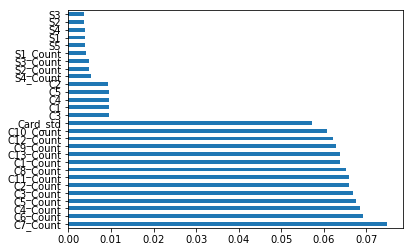

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
def feature_importance(forest):
    feature_importance = pd.Series(forest.feature_importances_, index=x_train.columns)
    feature_importance.sort(inplace=True,ascending=False)
    print("Feature ranking:")
    for f in range(x_train.shape[1]):
        print("%d. feature %s (%f)" % (f+1,feature_importance.index[f], feature_importance[f]))
    feature_importance.plot(kind="barh")
feature_importance(clf)

## Try to remove raw features
* Too many features will cause overfitting
* Raw features contains same information as extracted features
* if remove raw features will harm a lot of performance, that means we haven't extracted all information from raw features yet.

In [26]:
x_train=train[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']] 
y_train=train['Type']
x_test=test[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']]
y_test=test['Type']

def concat_card_count(data_set):
    suit_counts = []
    for i in range(1, 14):
        each_counts = pd.concat([data_set.C1 == i, data_set.C2 == i, data_set.C3 == i, data_set.C4 == i,data_set.C5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['C{}_Count'.format(i) for i in range(1,14)])
    return pd.concat([suit_counts_df, data_set], axis=1)

x_train = concat_card_count(x_train)
x_test = concat_card_count(x_test)

def concat_card_std(data_set):
    hands=data_set[['C1','C2','C3','C4','C5']].as_matrix()
    std=np.std(hands,axis=1)
    hands[hands==1] =14
    new_std = np.std(hands, axis=1)
    std[new_std<std] = new_std[new_std < std]
    std_df=pd.DataFrame(std,columns=['Card_std'])
    return pd.concat([std_df,data_set],axis=1)
x_train=concat_card_std(x_train)
x_test=concat_card_std(x_test)

def concat_suit_count(data_set):
    suit_counts = []
    for i in range(1, 5):
        each_counts = pd.concat([data_set.S1 == i, data_set.S2 == i, data_set.S3 == i, data_set.S4 == i,data_set.S5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['S{}_Count'.format(i) for i in range(1,5)])
    return pd.concat([suit_counts_df, data_set], axis=1)

x_train=concat_suit_count(x_train)
x_test=concat_suit_count(x_test)

def concat_suit_value_count(data_set):
    suit_counts = []
    for i in range(0, 6):
        each_counts = pd.concat([data_set.S1_Count == i, data_set.S2_Count == i, data_set.S3_Count == i, data_set.S4_Count == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['Suit_Value_Count_{}'.format(i) for i in range(0,6)])
    return pd.concat([suit_counts_df, data_set], axis=1)

x_train=concat_suit_value_count(x_train)
x_test=concat_suit_value_count(x_test)

x_train = x_train.drop(['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5'], axis=1)
x_test = x_test.drop(['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5'], axis=1)


clf=RandomForestClassifier(n_estimators=20)
clf=clf.fit(x_train,y_train)
print(classification_report(y_test,clf.predict(x_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    501209
          1       1.00      1.00      1.00    422498
          2       0.98      0.98      0.98     47622
          3       0.98      0.97      0.98     21121
          4       1.00      1.00      1.00      3885
          5       1.00      0.99      0.99      1996
          6       0.91      0.07      0.13      1424
          7       1.00      0.04      0.08       230
          8       1.00      0.50      0.67        12
          9       0.75      1.00      0.86         3

avg / total       1.00      1.00      1.00   1000000



* The performance does not drop a lot

## Add hand value count

In [27]:
x_train=train[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']] 
y_train=train['Type']
x_test=test[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']]
y_test=test['Type']

def concat_card_count(data_set):
    suit_counts = []
    for i in range(1, 14):
        each_counts = pd.concat([data_set.C1 == i,
                                 data_set.C2 == i, 
                                 data_set.C3 == i, 
                                 data_set.C4 == i,
                                 data_set.C5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['C{}_Count'.format(i) for i in range(1,14)])
    return pd.concat([suit_counts_df, data_set], axis=1)

x_train = concat_card_count(x_train)
x_test = concat_card_count(x_test)

def concat_card_std(data_set):
    hands=data_set[['C1','C2','C3','C4','C5']].as_matrix()
    std=np.std(hands,axis=1)
    hands[hands==1] =14
    new_std = np.std(hands, axis=1)
    std[new_std<std] = new_std[new_std < std]
    std_df=pd.DataFrame(std,columns=['Card_std'])
    return pd.concat([std_df,data_set],axis=1)
x_train=concat_card_std(x_train)
x_test=concat_card_std(x_test)

def concat_suit_count(data_set):
    suit_counts = []
    for i in range(1, 5):
        each_counts = pd.concat([data_set.S1 == i,
                                 data_set.S2 == i,
                                 data_set.S3 == i,
                                 data_set.S4 == i,
                                 data_set.S5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['S{}_Count'.format(i) for i in range(1,5)])
    return pd.concat([suit_counts_df, data_set], axis=1)

x_train=concat_suit_count(x_train)
x_test=concat_suit_count(x_test)

def concat_suit_value_count(data_set):
    suit_counts = []
    for i in range(0, 6):
        each_counts = pd.concat([data_set.S1_Count == i,
                                 data_set.S2_Count == i, 
                                 data_set.S3_Count == i, 
                                 data_set.S4_Count == i], 
                                axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['Suit_Value_Count_{}'.format(i) for i in range(0,6)])
    return pd.concat([suit_counts_df, data_set], axis=1)

x_train=concat_suit_value_count(x_train)
x_test=concat_suit_value_count(x_test)

x_train = x_train.drop(['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5'], axis=1)
x_test = x_test.drop(['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5'], axis=1)

def concat_hand_value_count(data_set):
    suit_counts = []
    for i in range(0, 6):
        each_counts = pd.concat([data_set.C1_Count == i,
                                 data_set.C2_Count == i, 
                                 data_set.C3_Count == i, 
                                 data_set.C4_Count == i,
                                 data_set.C5_Count == i,
                                 data_set.C6_Count == i, 
                                 data_set.C7_Count == i, 
                                 data_set.C8_Count == i,
                                 data_set.C9_Count == i,
                                 data_set.C10_Count == i, 
                                 data_set.C11_Count == i, 
                                 data_set.C12_Count == i,
                                 data_set.C13_Count == i,
                                ], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(),
                                  columns=['Card_Value_Count_{}'.format(i) for i in range(0,6)])
    return pd.concat([suit_counts_df, data_set], axis=1)

x_train=concat_hand_value_count(x_train)
x_test=concat_hand_value_count(x_test)

clf=RandomForestClassifier(n_estimators=20)
clf=clf.fit(x_train,y_train)
print(classification_report(y_test,clf.predict(x_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    501209
          1       1.00      1.00      1.00    422498
          2       1.00      1.00      1.00     47622
          3       1.00      1.00      1.00     21121
          4       1.00      1.00      1.00      3885
          5       1.00      1.00      1.00      1996
          6       1.00      1.00      1.00      1424
          7       1.00      1.00      1.00       230
          8       1.00      0.75      0.86        12
          9       0.75      1.00      0.86         3

avg / total       1.00      1.00      1.00   1000000



* This feature helps improve type 6 result

## Add flag for the Ace

In [28]:
x_train=train[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']] 
y_train=train['Type']
x_test=test[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']]
y_test=test['Type']

def concat_card_count(data_set):
    suit_counts = []
    for i in range(1, 14):
        each_counts = pd.concat([data_set.C1 == i,
                                 data_set.C2 == i, 
                                 data_set.C3 == i, 
                                 data_set.C4 == i,
                                 data_set.C5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['C{}_Count'.format(i) for i in range(1,14)])
    return pd.concat([suit_counts_df, data_set], axis=1)

x_train = concat_card_count(x_train)
x_test = concat_card_count(x_test)

def concat_card_std(data_set):
    hands=data_set[['C1','C2','C3','C4','C5']].as_matrix()
    std=np.std(hands,axis=1)
    hands[hands==1] =14
    new_std = np.std(hands, axis=1)
    std[new_std<std] = new_std[new_std < std]
    std_df=pd.DataFrame(std,columns=['Card_std'])
    return pd.concat([std_df,data_set],axis=1)
x_train=concat_card_std(x_train)
x_test=concat_card_std(x_test)

def concat_suit_count(data_set):
    suit_counts = []
    for i in range(1, 5):
        each_counts = pd.concat([data_set.S1 == i,
                                 data_set.S2 == i,
                                 data_set.S3 == i,
                                 data_set.S4 == i,
                                 data_set.S5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['S{}_Count'.format(i) for i in range(1,5)])
    return pd.concat([suit_counts_df, data_set], axis=1)

x_train=concat_suit_count(x_train)
x_test=concat_suit_count(x_test)

def concat_suit_value_count(data_set):
    suit_counts = []
    for i in range(0, 6):
        each_counts = pd.concat([data_set.S1_Count == i,
                                 data_set.S2_Count == i, 
                                 data_set.S3_Count == i, 
                                 data_set.S4_Count == i], 
                                axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['Suit_Value_Count_{}'.format(i) for i in range(0,6)])
    return pd.concat([suit_counts_df, data_set], axis=1)

x_train=concat_suit_value_count(x_train)
x_test=concat_suit_value_count(x_test)

x_train = x_train.drop(['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5'], axis=1)
x_test = x_test.drop(['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5'], axis=1)

def concat_hand_value_count(data_set):
    suit_counts = []
    for i in range(0, 6):
        each_counts = pd.concat([data_set.C1_Count == i,
                                 data_set.C2_Count == i, 
                                 data_set.C3_Count == i, 
                                 data_set.C4_Count == i,
                                 data_set.C5_Count == i,
                                 data_set.C6_Count == i, 
                                 data_set.C7_Count == i, 
                                 data_set.C8_Count == i,
                                 data_set.C9_Count == i,
                                 data_set.C10_Count == i, 
                                 data_set.C11_Count == i, 
                                 data_set.C12_Count == i,
                                 data_set.C13_Count == i,
                                ], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(),
                                  columns=['Card_Value_Count_{}'.format(i) for i in range(0,6)])
    return pd.concat([suit_counts_df, data_set], axis=1)

x_train=concat_hand_value_count(x_train)
x_test=concat_hand_value_count(x_test)

def concat_Ace_flag(data_set):
    data_set['Ace_flag']=data_set['C1_Count']==1
    return data_set
    
x_train=concat_Ace_flag(x_train)
x_test=concat_Ace_flag(x_test)


clf=RandomForestClassifier(n_estimators=20)
clf=clf.fit(x_train,y_train)
print(classification_report(y_test,clf.predict(x_test)))
print(accuracy_score(y_test,clf.predict(x_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    501209
          1       1.00      1.00      1.00    422498
          2       1.00      1.00      1.00     47622
          3       1.00      1.00      1.00     21121
          4       1.00      1.00      1.00      3885
          5       1.00      1.00      1.00      1996
          6       1.00      1.00      1.00      1424
          7       1.00      1.00      1.00       230
          8       1.00      0.83      0.91        12
          9       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00   1000000

0.999998
